# Продвинутая математика

## Решение дифференциальных уравнений

Sage позволяет решать дифференциальные уравнения. Например, решим уравнение вида $x' + x -1 = 0$. Объявим переменную t для символьных вычислений, определим функцию $x(t)$. Функция desolve решит дифференциальное уравнение и выведет его решение.  

In [2]:
t = var('t')    
x = function('x')(t)  
DE = diff(x, t) + x - 1
pretty_print(desolve(DE, [x,t]))

(_C + e^t)*e^(-t)

Теперь рассмотрим преобразования Лапласа в Sage. Вычислим преобразование Лапласа для $t^{2}e^{t}−sin(t)$.

In [3]:
s = var("s")
t = var("t")
f = t^2*exp(t) - sin(t)
pretty_print(f.laplace(t,s))

-1/(s^2 + 1) + 2/(s - 1)^3

В качестве более сложного примера, попробуем решить систему уравнений, которой задается отклонение от положения равновесия для пары пружин, прикрепленных к стене слева:
|------\/\/\/\/\---|масса1|----\/\/\/\/\/----|масса2|
        пружина1                пружина2

$m_{1}x_{1}′′+(k_{1}+k_{2})x_{1}−k_{2}x_{2} = 0$

$m_{2}x_{2}′′+k_{2}(x_{2}−x_{1}) = 0$

$m_{1} = 2 , m_{2} = 1, k_{1} = 4, k_{2}=2, x_{1}(0)=3, x′_{1}(0)=0, x_{2}(0)=3, x′_{2}(0)=0$

Сначала решим первое уравнение, $x = x_{1}, y = x_{2}$. Решать можно так же, как и в примере выше, или можно использовать maxima для упрощения вычислений.

In [9]:
t = var('t')    
x = function('x')(t)  
y = function('y')(t)  
de1 = 2*diff(x(t),t, 2) + 6*x(t) - 2*y(t)
pretty_print(de1.laplace(t, s))      

2*s^2*laplace(x(t), t, s) - 2*s*x(0) + 6*laplace(x(t), t, s) - 2*laplace(y(t), t, s) - 2*D[0](x)(0)

In [10]:
de1 = maxima("2*diff(x(t),t, 2) + 6*x(t) - 2*y(t)")
lde1 = de1.laplace("t","s")
pretty_print(lde1)

2*((-%at('diff(x(t),t,1),t=0))+s^2*'laplace(x(t),t,s)-x(0)*s)-2*'laplace(y(t),t,s)+6*'laplace(x(t),t,s)

Теперь решаем второе уравнение:

In [12]:
de2 = maxima("diff(y(t),t, 2) + 2*y(t) - 2*x(t)")
lde2 = de2.laplace("t","s")
pretty_print(lde2)

(-%at('diff(y(t),t,1),t=0))+s^2*'laplace(y(t),t,s)+2*'laplace(y(t),t,s)-2*'laplace(x(t),t,s)-y(0)*s

Теперь вставим начальные условия для $x(0), x′(0), y(0)$ и $y′(0)$, и решим уравения:

In [14]:
var('s X Y')
eqns = [(2*s^2+6)*X-2*Y == 6*s, -2*X +(s^2+2)*Y == 3*s]
pretty_print(solve(eqns, X,Y))

[[X == 3*(s^3 + 3*s)/(s^4 + 5*s^2 + 4), Y == 3*(s^3 + 5*s)/(s^4 + 5*s^2 + 4)]]

In [15]:
var('s t')
pretty_print(inverse_laplace((3*s^3 + 9*s)/(s^4 + 5*s^2 + 4),s,t))
pretty_print(inverse_laplace((3*s^3 + 15*s)/(s^4 + 5*s^2 + 4),s,t))

cos(2*t) + 2*cos(t)

-cos(2*t) + 4*cos(t)

Теперь построим графики полученных уравнений:


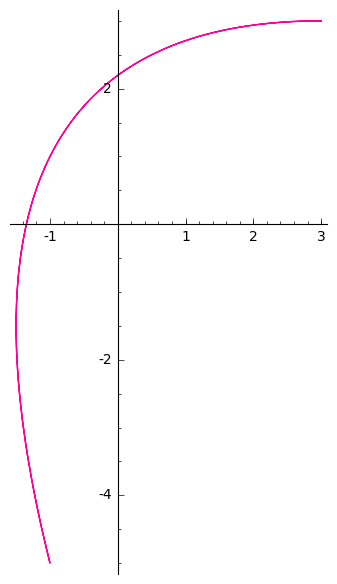

In [17]:
t = var('t')
P = parametric_plot((cos(2*t) + 2*cos(t), 4*cos(t) - cos(2*t) ),(t, 0, 2*pi), rgbcolor=hue(0.9))
show(P)

А теперь построим график для отдельных компонент.

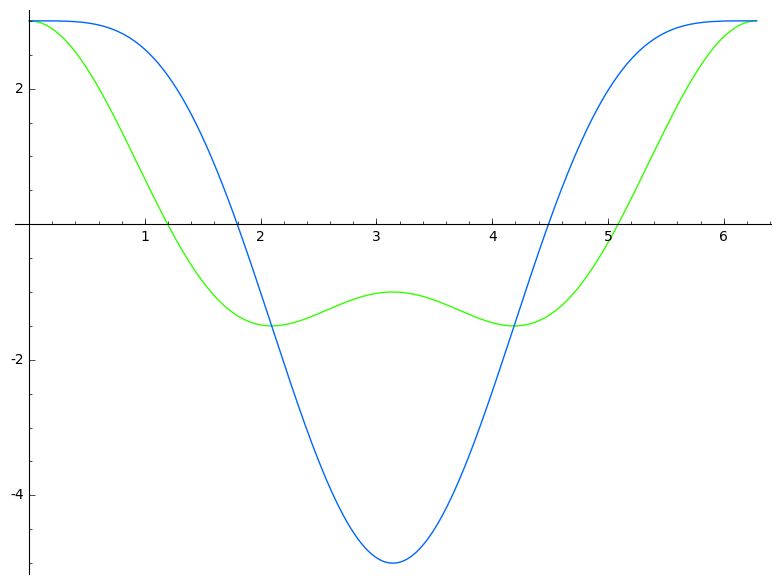

In [18]:
t = var('t')
p1 = plot(cos(2*t) + 2*cos(t), (t,0, 2*pi), rgbcolor=hue(0.3))
p2 = plot(4*cos(t) - cos(2*t), (t,0, 2*pi), rgbcolor=hue(0.6))
show(p1 + p2)

### Метод Эйлера для решения систем дифференциальных уравнений

В следующем примере показан метод Эйлера для дифференциальных уравнений первого и второго порядков. Напомним, что метод Эйлера является одношаговым явным методом решения дифференциальных уравнений. Сначала вспомним, что делается для уравнений первого порядка. Дана задача Коши:

$y′=f(x,y),y(a)=c$

требуется найти приблизительное значение решения при x=b и b>a.

Из определения производной следует, что $y′(x)≈\cfrac{y(x+h)−y(x)}{h}$

где $h>0$ дано и является небольшим. Это и дифференциальное уравнение дают $f(x,y(x))≈\cfrac{y(x+h)−y(x)}{h}$. Теперь надо решить для $y(x+h)$:

$y(x+h)≈y(x)+h⋅f(x,y(x))$.

Если назвать h⋅f(x,y(x)) «поправочным элементом», y(x) «прежним значением y» а y(x+h) «новым значением y», тогда данное приближение может быть выражено в виде

$y_{new}≈y_{old}+h⋅f(x,y_{old})$.

Если разбить интервал между a и b на n частей, чтобы h=b−an, тогда можно записать информацию для данного метода в таблицу.

Решение систем дифференциальных уравнений похоже на решение обычных дифференциальных уравнений.

Найдите численное приблизительное значение для z(t) при t=1, используя 4 шага метода Эйлера, где $z′′+t\cdot z′+z=0$, $z(0)=1, z′(0)=0$. Требуется привести дифференциальное уравнение 2го порядка к системе двух дифференцальных уравнений первого порядка (используя x=z, y=z′) и применить метод Эйлера:

In [19]:
t,x,y = PolynomialRing(RealField(10),3,"txy").gens()
f = y; g = -x - y * t
pretty_print(eulers_method_2x2(f,g, 0, 1, 0, 1/4, 1))

         t                    x                h*f(t,x,y)                    y           h*g(t,x,y)
         0                    1                      0.00                    0                -0.25
       1/4                  1.0                    -0.062                -0.25                -0.23
       1/2                 0.94                     -0.12                -0.48                -0.17
       3/4                 0.82                     -0.16                -0.66               -0.081
         1                 0.65                     -0.18                -0.74                0.022


None

Можно построить график для точек (x,y), чтобы получить приблизительный вид кривой. Функция eulers_method_2x2_plot выполнит данную задачу; для этого надо определить функции f и g, аргумент которых имеет три координаты: (t, x, y).

In [20]:
f = lambda z: z[2]        # f(t,x,y) = y
g = lambda z: -sin(z[1])  # g(t,x,y) = -sin(x)
P = eulers_method_2x2_plot(f,g, 0.0, 0.75, 0.0, 0.1, 1.0)

В этот момент P содержит в себе два графика: P[0] - график x по t и P[1] - график y по t. Оба эти графика могут быть выведены следующим образом:

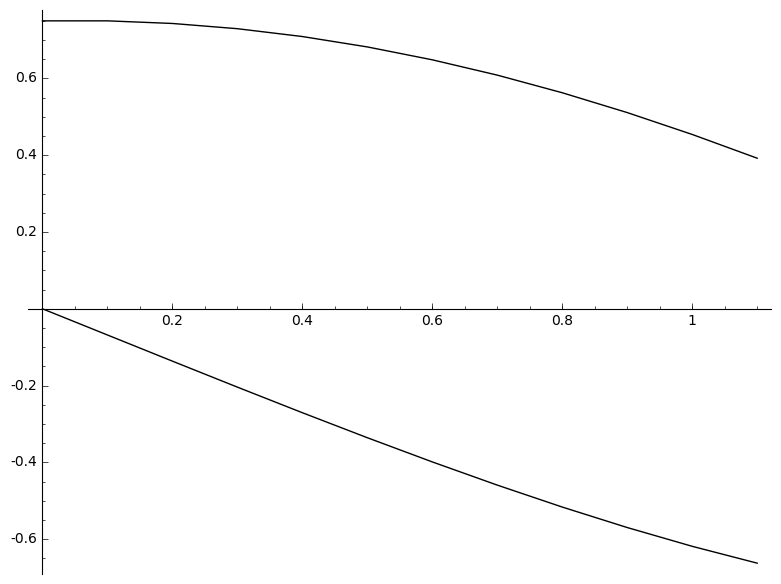

In [21]:
show(P[0] + P[1])

## Теория чисел

SageMath предоставляет набор инструментов для работы в области теории чисел. Вы можете использовать матпакет для решения задач по типу китайской теоремы об остатках, можете вычислять НОД числа, а также решать диофантово уравнение. Например функция `xgcd()` возвращает тройку чисел `(g,s,t)` таких, что `g = s⋅a+t⋅b = gcd(a,b)`. В параметры достаточно передать коэффициенты диофантова уравнения и вы получите результат. 

Чтобы использовать китайскую теорему об остатках, следует вызвать функцию `crt()` и ей в параметры передать два списка: первый список - числа, с которыми сравнивается искомое число `x`, второй список - те числа, по модулю которых идут сравнения соответственно

Один из любимых студентами раздел математики - комбинаторика - когда-то был частью теории чисел. Сейчас комбинаторика оформилась как самостоятельная наука. Однако это не мешает нам предложить вам решить две комбинаторные задачи. На всякий случай, напомним 3 основные формулы комбинаторики:

$P_{n} = n!$ - число перестановок. Данная формула используется, когда перебирается абсолютно все множество.

$\binom{n}{k} = \cfrac{n!}{(n-k)!\cdot k!}$ - число сочетаний. Данная формула позволяет узнать, сколькими способами можно выбрать k элементов из n.

$(n)_{k} = \cfrac{n!}{(n-k)!}$ - число размещений. Данная формула позволяет узнать, сколькими способами можно выбрать и разложить k элементов из n по k местам.